In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import h5py
import copy
import datetime
import ta

# ConvergenceWarning('ignore')
# Do you wanna see?
verbose = True

import sys
sys.path.append('../')

from utils.data_extraction import load_data
from utils.data_cleaning import HFDataCleaning
from utils.generate_features import candleCreateNP_vect_final,\
                                    generateFeatures_final
from utils.preprocessing_features_and_labels import extract_labels,\
                                                    align_features_and_labels,\
                                                    pre_processing_initial,\
                                                    pre_processing_extended,\
                                                    pre_processing

In [3]:
# print(os.listdir())
try:
    path = 'a:/taqhdf5'  #'a:/taqhdf5'
    os.listdir(path)
except:
    path = 't:/taqhdf5'  #'a:/taqhdf5'
    os.listdir(path)    
# allFiles = os.listdir(path)
# print(len(allFiles), allFiles[:5], allFiles[-5:])
# print(allFiles[-10:])

# dates = np.array(['2020040' + str(i) if i < 10 else '202004' + str(i) for i in np.arange(1,32)]).astype(int)
dates = np.array(['20200401']).astype(int)#,'20200402','20200403','20200406','20200407'

# Provide a list of tickers of interest
tickers = ['GOOG']#'MSFT'

# Do we need data on trades, quotes or both?
dataNeeded = 'both' # 'trades', 'quotes' or 'both'

# run load_data()
if dataNeeded == 'trades':
    tradeData = load_data(dates, tickers, dataNeeded, path, verbose)
elif dataNeeded == 'quotes':
    quoteData = load_data(dates, tickers, dataNeeded, path, verbose)
elif dataNeeded == 'both':
    tradeData, quoteData = load_data(dates, tickers, dataNeeded, path, verbose)

['.ipynb_checkpoints', 'Old Versions', 'preprocessing.ipynb', 'Quote_vs_trade_candles.ipynb', 'testing_and_comparing_candlesticks.ipynb', 'testing_features.ipynb', 'testing_preprocessing_features_and_labels.ipynb']
8541 ['taq_19930315.h5', 'taq_19930104.h5', 'taq_19930317.h5', 'taq_19930105.h5', 'taq_19930316.h5'] ['taqtrade_20200616.h5', 'taqtrade_20200619.h5', 'taqtrade_20200624.h5', 'taqtrade_20200629.h5', 'taqquote_20200602.h5']
['taqtrade_20200602.h5', 'taqtrade_20200603.h5', 'taqtrade_20200605.h5', 'taqtrade_20200609.h5', 'taqtrade_20200611.h5', 'taqtrade_20200616.h5', 'taqtrade_20200619.h5', 'taqtrade_20200624.h5', 'taqtrade_20200629.h5', 'taqquote_20200602.h5']
##### Date range #####

Date, Min: 20200401
Date, Max: 20200401

##### Data Extraction begins #####

Both trade and quote data is being extracted..

### Trade Data ###

The raw H5 trade file contains:  ['TradeIndex', 'Trades'] 

Ticker Information:  (b'GOOG            ', 26900500, 71427) 

Sneak peak of the data

       

In [4]:
tradeData

,utcsec,ex,cond,volume,price,TradeStopStockIndicator,corr,TradeSequenceNumber,TradeID,SourceOfTrade,TradeReportingFacility,ParticipantTime,TRFTime,TTE,Date,Timestamp,TSRemainder,Hour,Minute,Ticker
0,14400048517953,P,@ TI,67,1139.44,,00,1507,1,N,,14400048141056,99,0,20200401,2020-04-01 04:00:00.048517,953,4,0,GOOG
1,14422296771981,P,@ TI,20,1138.55,,00,1552,2,N,,14422296394240,99,0,20200401,2020-04-01 04:00:22.296771,981,4,0,GOOG
2,14429472894282,Q,@FTI,1,1138.54,,00,1554,1,N,,14429472872353,99,1,20200401,2020-04-01 04:00:29.472894,282,4,0,GOOG
3,14506997225243,P,@ TI,31,1143.65,,00,1581,3,N,,14506996848640,99,0,20200401,2020-04-01 04:01:46.997225,243,4,1,GOOG
4,14516526073882,P,@ TI,1,1143.59,,00,1587,4,N,,14516525699840,99,0,20200401,2020-04-01 04:01:56.526073,882,4,1,GOOG
5,14559559011030,Q,@ TI,3,1140.00,,00,1607,2,N,,14559558989712,99,0,20200401,2020-04-01 04:02:39.559011,030,4,2,GOOG
6,14599876695904,Q,@FTI,25,1136.52,,00,1621,3,N,,14599876673317,99,1,20200401,2020-04-01 04:03:19.876695,904,4,3,GOOG
7,14599876699507,Q,@FTI,4,1135.00,,00,1622,4,N,,14599876673317,99,1,20200401,2020-04-01 04:03:19.876699,507,4,3,GOOG
8,14599876704167,Q,@FTI,96,1131.41,,00,1623,5,N,,14599876673317,99,1,20200401,2020-04-01 04:03:19.876704,167,4,3,GOOG
9,14599876722045,Q,@FTI,4,1131.41,,00,1624,6,N,,14599876688151,99,1,20200401,2020-04-01 04:03:19.876722,045,4,3,GOOG


In [5]:
quoteData

,utcsec,ex,bid,bidsize,ofr,ofrsize,mode,Date,Timestamp,TSRemainder,Hour,Minute,Ticker,price,spread
0,14400049177409,P,963.00,1,0.00,0,R,20200401,2020-04-01 04:00:00.049177,409,4,0,GOOG,481.500,-963.00
1,14400049177610,P,985.65,1,0.00,0,R,20200401,2020-04-01 04:00:00.049177,610,4,0,GOOG,492.825,-985.65
2,14400049181518,P,999.00,1,0.00,0,R,20200401,2020-04-01 04:00:00.049181,518,4,0,GOOG,499.500,-999.00
3,14400049181691,P,1018.00,1,0.00,0,R,20200401,2020-04-01 04:00:00.049181,691,4,0,GOOG,509.000,-1018.00
4,14400049274621,P,1018.00,1,1188.88,3,R,20200401,2020-04-01 04:00:00.049274,621,4,0,GOOG,1103.440,170.88
5,14400049539719,P,1056.32,1,1188.88,3,R,20200401,2020-04-01 04:00:00.049539,719,4,0,GOOG,1122.600,132.56
6,14400049632755,P,1060.00,1,1188.88,3,R,20200401,2020-04-01 04:00:00.049632,755,4,0,GOOG,1124.440,128.88
7,14400049757133,P,1090.00,1,1188.88,3,R,20200401,2020-04-01 04:00:00.049757,133,4,0,GOOG,1139.440,98.88
8,14400050913562,P,1095.01,1,1188.88,3,R,20200401,2020-04-01 04:00:00.050913,562,4,0,GOOG,1141.945,93.87
9,14400051050035,P,1095.01,1,1180.00,1,R,20200401,2020-04-01 04:00:00.051050,035,4,0,GOOG,1137.505,84.99


# Clean datasets

In [13]:
########### Clean tradeData ###########
    
DATA_SAMPLE = 'full' # or 'stable'

if DATA_SAMPLE == 'stable':
    # P1 is used for keeping data within [9.5, 16]
    cleaned_tradeData = HFDataCleaning(['P1_2','p2','t1','p3'],tradeData,'trade',['q'])
elif DATA_SAMPLE == 'full':
    # P1_2 is used for keeping data within [9, 16.5]
    cleaned_tradeData = HFDataCleaning(['P1_2','p2','t1','p3'],tradeData,'trade',['q'])#'t1',tradeData
    
    
########### Clean quoteData ###########
    
DATA_SAMPLE = 'full' # or 'stable'

if DATA_SAMPLE == 'stable':
    # P1 is used for keeping data within [9.5, 16]
    cleaned_quoteData = HFDataCleaning(['P1_2','p2', 'q2', 'p3'],quoteData,'quote',['q'])
elif DATA_SAMPLE == 'full':
    # P1_2 is used for keeping data within [9, 16.5]
    cleaned_quoteData = HFDataCleaning(['P1_2','p2', 'q2', 'p3'],quoteData,'quote',['q'])#'t1',tradeData
        

In [28]:
cleaned_tradeData.head(10)

,utcsec,ex,cond,volume,price,TradeStopStockIndicator,corr,TradeSequenceNumber,TradeID,SourceOfTrade,...,TRFTime,TTE,Date,Timestamp,TSRemainder,Hour,Minute,Ticker,hour_min_col,time_group
0,32485885409069,Q,@ TI,30,1124.62,,00,26476,293,N,...,99,0,20200401,2020-04-01 09:01:25.885409,069,9,1,GOOG,9.023857,1
1,32486612971716,Q,@ TI,30,1124.51,,00,26492,294,N,...,99,0,20200401,2020-04-01 09:01:26.612971,716,9,1,GOOG,9.024059,1
2,32519261072977,Q,@ TI,1,1125.74,,00,26668,295,N,...,99,0,20200401,2020-04-01 09:01:59.261072,977,9,1,GOOG,9.033128,1
3,32525016359664,Q,@ TI,2,1125.74,,00,26710,296,N,...,99,0,20200401,2020-04-01 09:02:05.016359,664,9,2,GOOG,9.034727,2
4,32611276175419,Q,@ TI,27,1125.22,,00,27229,297,N,...,99,0,20200401,2020-04-01 09:03:31.276175,419,9,3,GOOG,9.058688,3
5,32611276179601,Q,@ TI,2,1125.40,,00,27230,298,N,...,99,0,20200401,2020-04-01 09:03:31.276179,601,9,3,GOOG,9.058688,3
6,32611276183113,Q,@ TI,1,1125.40,,00,27231,299,N,...,99,0,20200401,2020-04-01 09:03:31.276183,113,9,3,GOOG,9.058688,3
7,32611276188123,Q,@ TI,1,1126.15,,00,27232,300,N,...,99,0,20200401,2020-04-01 09:03:31.276188,123,9,3,GOOG,9.058688,3
8,32611276191620,Q,@ TI,19,1126.94,,00,27233,301,N,...,99,0,20200401,2020-04-01 09:03:31.276191,620,9,3,GOOG,9.058688,3
9,32805356294187,Q,@FTI,1,1126.62,,00,28342,302,N,...,99,1,20200401,2020-04-01 09:06:45.356294,187,9,6,GOOG,9.112599,6


In [26]:
cleaned_quoteData.head(10)

,utcsec,ex,bid,bidsize,ofr,ofrsize,mode,Date,Timestamp,TSRemainder,Hour,Minute,Ticker,price,spread,hour_min_col,time_group
0,32410811640306,Q,1124.0,7,1134.47,1,R,20200401,2020-04-01 09:00:10.811640,306,9,0,GOOG,1129.235,10.47,9.003003,0
1,32410812050553,Q,1124.0,8,1134.47,1,R,20200401,2020-04-01 09:00:10.812050,553,9,0,GOOG,1129.235,10.47,9.003003,0
2,32415823014688,Q,1124.0,7,1134.47,1,R,20200401,2020-04-01 09:00:15.823014,688,9,0,GOOG,1129.235,10.47,9.004395,0
3,32415823420468,Q,1124.0,8,1134.47,1,R,20200401,2020-04-01 09:00:15.823420,468,9,0,GOOG,1129.235,10.47,9.004395,0
4,32416811706275,Q,1124.0,7,1134.47,1,R,20200401,2020-04-01 09:00:16.811706,275,9,0,GOOG,1129.235,10.47,9.004670,0
5,32432380491088,Q,1124.0,8,1134.47,1,R,20200401,2020-04-01 09:00:32.380491,088,9,0,GOOG,1129.235,10.47,9.008995,0
6,32432410489767,Q,1124.0,7,1134.47,1,R,20200401,2020-04-01 09:00:32.410489,767,9,0,GOOG,1129.235,10.47,9.009003,0
7,32443664221028,Q,1124.0,7,1139.90,1,R,20200401,2020-04-01 09:00:43.664221,028,9,0,GOOG,1131.950,15.90,9.012129,0
8,32443669281068,Q,1124.0,7,1134.49,1,R,20200401,2020-04-01 09:00:43.669281,068,9,0,GOOG,1129.245,10.49,9.012130,0
9,32450960939439,Q,1124.0,7,1139.90,1,R,20200401,2020-04-01 09:00:50.960939,439,9,0,GOOG,1131.950,15.90,9.014156,0


# Construct candles

In [21]:
########### Construct Candles ################
# candles = candleCreateNP_vect_final(cleanedData
#                          ,1)

candles_trade = candleCreateNP_vect_final(data = cleaned_tradeData,
                                       step = 1,
                                        verbose=False,
                                        fillHoles=True,
                                        sample='full',
                                        numpied=False)

candles_quote = candleCreateNP_vect_final(data = cleaned_quoteData,
                                       step = 1,
                                        verbose=False,
                                        fillHoles=True,
                                        sample='full',
                                        numpied=False)

In [32]:
print(candles_trade.shape[0])
candles_trade.head(10)

450


price                           
                        open     high      low    close
Date     time_group                                    
20200401 0               NaN      NaN      NaN      NaN
         1           1124.62  1125.74  1124.51  1125.74
         2           1125.74  1125.74  1125.74  1125.74
         3           1125.22  1126.94  1125.22  1126.94
         4           1126.94  1126.94  1126.94  1126.94
         5           1126.94  1126.94  1126.94  1126.94
         6           1126.62  1126.62  1126.62  1126.62
         7           1126.80  1126.80  1126.80  1126.80
         8           1126.80  1126.80  1126.80  1126.80
         9           1127.00  1127.00  1125.41  1125.41

In [31]:
print(candles_quote.shape[0])
candles_quote.head(10)

450


price                              
                         open      high       low     close
Date     time_group                                        
20200401 0           1129.235  1131.950  1129.160  1131.950
         1           1128.540  1131.950  1127.185  1131.650
         2           1127.545  1131.650  1127.545  1131.650
         3           1128.580  1131.650  1128.000  1128.745
         4           1128.745  1128.745  1128.745  1128.745
         5           1128.745  1128.745  1128.745  1128.745
         6           1128.745  1128.745  1127.505  1128.745
         7           1128.745  1131.650  1128.065  1129.460
         8           1131.650  1131.775  1128.205  1131.650
         9           1131.775  1131.775  1129.000  1131.650

# Adjust candle function to return spread
- At least for now (should be sufficient though), we will only return spread at open and at close (spreads at high/low are tricky, and we shouldn't use them as entry prices anyway)

In [107]:
            
# Final vectorized function (currently v5)
def candleCreateNP_vect_final_v2(data
                        ,step
                        ,verbose=False
                        ,fillHoles=True
                        ,sample='stable'
                        ,numpied=True
                        ,return_spreads=False):

    # v1-v4:
    #data['hour_min_col'] = data['Hour'] + data['Minute']/60
    
    # v5:
    # generate hour_min_col to hold floated Timestamp for time binning into candles
    Timestamp_dt = data['Timestamp'].dt
    Timestamp_float = Timestamp_dt.hour \
                      + Timestamp_dt.minute/60 \
                      + Timestamp_dt.second/(60*60) \
                      + Timestamp_dt.microsecond/(60*60*10**6)
    data['hour_min_col'] = Timestamp_float    
              
    if verbose:
        print(f"min and max of new hour_min_col: \
              {data['hour_min_col'].min()}, {data['hour_min_col'].max()}")

    # setup time_bins to group each timestamp
    delta = step/60
              
    if sample == 'full':
        time_bins = np.arange(9, 16.5+delta, delta)
    else:
        time_bins = np.arange(9.5, 16+delta, delta)

    # put each timestamp into a bucket according to time_bins defined by the step variable
    data['time_group'] = pd.cut(data['hour_min_col'], bins=time_bins, right=True, labels=False)

    # group by date and time_group, extract price, take it open, max, min, last (open, high, low, close)
    OHLC = data.groupby(['Date','time_group'])[['price']].agg(['first', 'max', 'min', 'last'])
    OHLC = OHLC.rename(columns={'first':'open'
                                ,'max':'high'
                                ,'min':'low'
                                ,'last':'close'})
              
    if return_spreads:
        assert 'spread' in data.columns, 'The input data is not quotes data which it must be for return_spread == True'
        spreads = data.groupby(['Date','time_group'])[['spread']].agg(['first', 'last'])
        spreads = spreads.rename(columns={'first':'open',
                                          'last':'close'})    
        OHLC = pd.concat([OHLC, spreads], axis=1)
              
    ###Let check if we are missing any values       
    # number of days
    dayz = len(OHLC.index.get_level_values(0).unique())
              
    # if 
    if len(OHLC.index.get_level_values(1))!=((len(time_bins)-1)*dayz):

        ##### Creating our temporary table, with all the indices that is surposed to be in the actual candle-table.
        ## Creating the multiIndex-index
        mtInd = pd.MultiIndex.from_product([OHLC.index.get_level_values(0).unique(), np.arange(len(time_bins)-1)],
                                   names=['Date','time_group'])

        ## Creating the multiIndex-columns
        if not return_spreads:
            mtCol = pd.MultiIndex.from_product([['price'], ['open','high','low','close']])
        else:
            mtCol = pd.MultiIndex.from_tuples([('price', 'open'),
                                               ('price', 'high'),
                                               ('price', 'low'),
                                               ('price', 'close'),
                                               ('spread', 'open'),
                                               ('spread', 'close')])
        
        ## Creating the table itself
        tempDf = pd.DataFrame(np.nan
                              ,columns=mtCol
                              ,index=mtInd)

        # Filling the non-empty elements of OHLC into the temp-table
        tempDf.loc[OHLC.index]=OHLC.copy(deep=True)

        # To see that the filling mechanism works:
        if fillHoles:

            if not return_spreads:
                # Storing the indices to be filled
                toBeFilled = tempDf[tempDf.price['close'].isna()].index

                # Fill out the empty ones!
                dataToFillIn = tempDf.price['close'].fillna(method='ffill').loc[toBeFilled]
                tempDf.loc[toBeFilled] = pd.DataFrame({('price','open'): dataToFillIn,
                                                      ('price','high'): dataToFillIn,
                                                      ('price','low'): dataToFillIn,
                                                      ('price','close'): dataToFillIn})

            else:
                # Storing the indices to be filled
                toBeFilled_price = tempDf[tempDf.price['close'].isna()].index 
                toBeFilled_spread = tempDf[tempDf.spread['close'].isna()].index 
              
                # Fill out the empty ones!
                dataToFillIn_price = tempDf.price['close'].fillna(method='ffill').loc[toBeFilled_price]
                dataToFillIn_spread = tempDf.spread['close'].fillna(method='ffill').loc[toBeFilled_spread]
              
                tempDf.loc[toBeFilled_price, ('price')] = pd.DataFrame({('price','open'): dataToFillIn_price,
                                                                          ('price','high'): dataToFillIn_price,
                                                                          ('price','low'): dataToFillIn_price,
                                                                          ('price','close'): dataToFillIn_price,                                                      
                                                                          })  
              
                tempDf.loc[toBeFilled_spread, ('spread')] = pd.DataFrame({('spread','open'): dataToFillIn_spread,
                                                                          ('spread','close'): dataToFillIn_spread,  
                                                                           }) 

        # Return the complete data
        if numpied:
            return tempDf.values
        else:
            return tempDf

    else:
              
        # return as numpy if preferred      
        if numpied:
            return OHLC.values
        else:
            return OHLC

In [182]:
candles_trade_test = candleCreateNP_vect_final_v2(data = cleaned_tradeData,
                                        step = 1,
                                        verbose=False,
                                        fillHoles=True,
                                        sample='full',
                                        numpied=False,
                                        return_spreads=False)

candles_quote_test = candleCreateNP_vect_final_v2(data = cleaned_quoteData,
                                                   step = 1,
                                                    verbose=False,
                                                    fillHoles=True,
                                                    sample='full',
                                                    numpied=False,
                                                    return_spreads=True)

In [183]:
candles_trade_test

price                           
                        open     high      low    close
Date     time_group                                    
20200401 0               NaN      NaN      NaN      NaN
         1           1124.62  1125.74  1124.51  1125.74
         2           1125.74  1125.74  1125.74  1125.74
         3           1125.22  1126.94  1125.22  1126.94
         4           1126.94  1126.94  1126.94  1126.94
         5           1126.94  1126.94  1126.94  1126.94
         6           1126.62  1126.62  1126.62  1126.62
         7           1126.80  1126.80  1126.80  1126.80
         8           1126.80  1126.80  1126.80  1126.80
         9           1127.00  1127.00  1125.41  1125.41
         10          1125.79  1125.79  1125.79  1125.79
         11          1125.79  1125.79  1125.79  1125.79
         12          1125.79  1125.79  1125.79  1125.79
         13          1125.79  1125.79  1125.79  1125.79
         14          1125.79  1125.79  1125.79  1125.79
         15          1127.75  1127.78  1127.75  1127.78
         16          1126.01  1126.01  1125.21  1125.21
         17          1126.00  1127.00  1126.00  1127.00
         18          1124.99  1125.89  1124.99  1125.89
         19          1125.89  1125.89  1124.99  1124.99
         20          1125.90  1125.90  1124.00  1124.00
         21          1124.00  1124.00  1124.00  1124.00
         22          1124.20  1124.20  1124.20  1124.20
         23          1125.70  1125.79  1124.00  1124.00
         24          1124.00  1124.00  1124.00  1124.00
         25          1124.43  1124.43  1124.43  1124.43
         26          1124.37  1126.00  1124.37  1126.00
         27          1124.98  1125.97  1124.98  1125.97
         28          1124.86  1125.70  1123.00  1125.70
         29          1123.70  1123.70  1122.26  1122.26
...                      ...      ...      ...      ...
         420         1105.62  1105.62  1105.62  1105.62
         421         1109.35  1109.35  1105.60  1109.11
         422         1107.79  1109.00  1107.79  1109.00
         423         1109.00  1109.00  1109.00  1109.00
         424         1108.84  1108.84  1108.84  1108.84
         425         1108.84  1108.84  1108.84  1108.84
         426         1108.84  1108.84  1108.84  1108.84
         427         1108.84  1108.84  1108.84  1108.84
         428         1105.62  1106.01  1105.62  1106.00
         429         1105.00  1105.00  1105.00  1105.00
         430         1104.00  1105.83  1104.00  1104.00
         431         1104.00  1104.00  1104.00  1104.00
         432         1104.00  1104.00  1104.00  1104.00
         433         1104.06  1104.06  1104.06  1104.06
         434         1104.06  1104.06  1104.00  1104.00
         435         1104.00  1104.00  1104.00  1104.00
         436         1103.06  1103.06  1103.00  1103.00
         437         1103.42  1103.42  1103.42  1103.42
         438         1101.42  1101.42  1101.42  1101.42
         439         1103.42  1103.42  1103.42  1103.42
         440         1101.36  1101.36  1101.36  1101.36
         441         1101.36  1101.36  1101.36  1101.36
         442         1101.36  1101.36  1101.36  1101.36
         443         1101.36  1101.36  1101.36  1101.36
         444         1101.36  1101.36  1101.36  1101.36
         445         1102.59  1102.59  1102.59  1102.59
         446         1102.59  1102.59  1102.59  1102.59
         447         1102.59  1102.59  1102.59  1102.59
         448         1102.59  1102.59  1102.59  1102.59
         449         1102.59  1102.59  1102.59  1102.59

[450 rows x 4 columns]

In [184]:
candles_quote_test

price                               spread       
                         open      high       low     close   open  close
Date     time_group                                                      
20200401 0           1129.235  1131.950  1129.160  1131.950  10.47  15.90
         1           1128.540  1131.950  1127.185  1131.650   9.08  15.30
         2           1127.545  1131.650  1127.545  1131.650   7.09  15.30
         3           1128.580  1131.650  1128.000  1128.745   9.16   9.49
         4           1128.745  1128.745  1128.745  1128.745   9.49   9.49
         5           1128.745  1128.745  1128.745  1128.745   9.49   9.49
         6           1128.745  1128.745  1127.505  1128.745   9.49   9.49
         7           1128.745  1131.650  1128.065  1129.460   9.49  10.92
         8           1131.650  1131.775  1128.205  1131.650  15.30  15.30
         9           1131.775  1131.775  1129.000  1131.650  15.55  15.30
         10          1131.775  1131.775  1128.440  1128.440  15.55   8.88
         11          1128.000  1128.320  1128.000  1128.320   8.00   7.36
         12          1128.000  1128.435  1127.940  1128.040   8.00   7.68
         13          1127.940  1128.040  1127.940  1128.040   7.88   7.68
         14          1128.130  1128.435  1127.940  1128.305   7.50   7.15
         15          1128.310  1128.645  1127.485  1127.940   7.14   7.88
         16          1127.485  1132.145  1125.800  1131.500   6.97  15.00
         17          1131.650  1131.995  1125.000  1125.000  14.70   2.00
         18          1125.000  1125.000  1125.000  1125.000   2.00   2.00
         19          1125.065  1125.065  1125.000  1125.000   1.87   2.00
         20          1125.000  1125.000  1125.000  1125.000   2.00   2.00
         21          1125.000  1125.000  1125.000  1125.000   2.00   2.00
         22          1124.900  1125.000  1124.900  1125.000   1.80   2.00
         23          1125.000  1125.000  1124.500  1124.500   2.00   1.00
         24          1124.430  1124.430  1124.430  1124.430   0.86   0.86
         25          1124.500  1124.500  1124.500  1124.500   1.00   1.00
         26          1124.430  1132.080  1124.430  1127.675   0.86   5.63
         27          1126.430  1132.380  1126.430  1128.430   3.14   7.14
         28          1132.380  1132.380  1122.500  1126.750  15.04  10.50
         29          1123.125  1123.125  1121.650  1121.650   3.25   1.22
...                       ...       ...       ...       ...    ...    ...
         420         1105.500  1110.455  1105.500  1109.715   0.24  13.31
         421         1110.415  1111.785  1107.595  1110.580  11.91  12.74
         422         1110.005  1110.005  1110.005  1110.005  13.89  13.89
         423         1108.475  1108.545  1107.475  1107.975  16.95  17.95
         424         1107.475  1108.720  1107.475  1107.475  18.95  18.95
         425         1107.975  1109.500  1107.975  1109.000  17.95  22.00
         426         1108.750  1108.750  1108.750  1108.750  21.50  21.50
         427         1109.250  1109.500  1105.135  1105.135  20.50  12.27
         428         1108.135  1113.000  1102.000  1102.500   6.27   7.00
         429         1105.500  1105.500  1102.500  1105.000   1.00   2.00
         430         1104.530  1111.280  1104.530  1111.280   2.94  16.44
         431         1109.250  1111.750  1109.250  1111.750  20.50  15.50
         432         1111.750  1111.750  1111.750  1111.750  15.50  15.50
         433         1111.750  1111.750  1111.750  1111.750  15.50  15.50
         434         1111.420  1111.750  1109.000  1111.250  14.84  16.50
         435         1108.500  1111.250  1108.500  1108.500  11.00  11.00
         436         1111.250  1111.250  1101.295  1105.750  16.50  16.50
         437         1105.750  1105.750  1105.750  1105.750  16.50  16.50
         438         1105.750  1105.750  1105.750  1105.750  16.50  16.50
         439         1105.750  1105.750  1105.750  1105.750  16.50  16.50
         440         1105.75

In [102]:
# spread at index 420 (means a few millisec after 16:00) seems high, check it out
cleaned_quoteData[(cleaned_quoteData['hour_min_col'] > 16) & (cleaned_quoteData['hour_min_col'] < 16.002)]

,utcsec,ex,bid,bidsize,ofr,ofrsize,mode,Date,Timestamp,TSRemainder,Hour,Minute,Ticker,price,spread,hour_min_col,time_group
234285,57600037491694,Q,1105.38,16,1105.62,5,R,20200401,2020-04-01 16:00:00.037491,694,16,0,GOOG,1105.500,0.24,16.000010,420
234286,57600573843208,Q,1105.38,16,1105.62,1,R,20200401,2020-04-01 16:00:00.573843,208,16,0,GOOG,1105.500,0.24,16.000159,420
234287,57600573844595,Q,1105.38,16,1106.00,4,R,20200401,2020-04-01 16:00:00.573844,595,16,0,GOOG,1105.690,0.62,16.000159,420
234288,57600599331290,Q,1105.27,17,1106.00,4,R,20200401,2020-04-01 16:00:00.599331,290,16,0,GOOG,1105.635,0.73,16.000166,420
234289,57600599333357,Q,1105.27,17,1106.01,3,R,20200401,2020-04-01 16:00:00.599333,357,16,0,GOOG,1105.640,0.74,16.000166,420
234290,57600612100872,Q,1105.27,11,1106.01,3,R,20200401,2020-04-01 16:00:00.612100,872,16,0,GOOG,1105.640,0.74,16.000170,420
234291,57600612101066,Q,1105.27,5,1106.01,3,R,20200401,2020-04-01 16:00:00.612101,066,16,0,GOOG,1105.640,0.74,16.000170,420
234292,57600612102756,Q,1105.25,7,1106.01,3,R,20200401,2020-04-01 16:00:00.612102,756,16,0,GOOG,1105.630,0.76,16.000170,420
234293,57600612104873,Q,1105.25,7,1106.15,10,R,20200401,2020-04-01 16:00:00.612104,873,16,0,GOOG,1105.700,0.90,16.000170,420
234294,57600626554655,Q,1105.19,8,1106.15,10,R,20200401,2020-04-01 16:00:00.626554,655,16,0,GOOG,1105.670,0.96,16.000174,420


In [103]:
candles_quote_test.loc[:, [('price', 'open'),
                           ('price', 'high'),
                           ('price', 'low'),
                           ('price', 'close'),
                           ('spread', 'open'),
                           ('spread', 'close'),
                          ]].head(5)

price                               spread       
                         open      high       low     close   open  close
Date     time_group                                                      
20200401 0           1129.235  1131.950  1129.160  1131.950  10.47  15.90
         1           1128.540  1131.950  1127.185  1131.650   9.08  15.30
         2           1127.545  1131.650  1127.545  1131.650   7.09  15.30
         3           1128.580  1131.650  1128.000  1128.745   9.16   9.49
         4           1128.745  1128.745  1128.745  1128.745   9.49   9.49

# Plot candlesticks and compare

In [173]:
def graph_data(data=None, figsize=(32,16), xlim='', ylim=''):

    fig = plt.figure(figsize=figsize) #(32/2,16/2))
    ax1 = plt.subplot2grid((1,1), (0,0))

    date, closep, highp, lowp, openp, adj_closep, volume = data[['snapshotTime', 
                                                              'closeMid', 
                                                              'highMid', 
                                                              'lowMid', 
                                                              'openMid',
                                                              'closeMid',
                                                              'lastTradedVolume']].T.to_numpy()

    date = data.index
    
    x = 0 #start_idx 
    y = data.shape[0] #end_idx    
    ohlc = []
    #date[0]

    while x < y:
        try:
            append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x] #append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        except:
            print(x,y, openp[x], closep[x])
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.6, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    #ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    #ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)

    if xlim:
        ax1.set_xlim(xlim)
    if ylim:
        ax1.set_ylim(ylim)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('FTSE')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)

    return fig,ax1



In [135]:
candles_quote_test.shape

(450, 6)

In [155]:
pd.Series(candles_quote_test[('price'), ('close')].values)

0      1131.950
1      1131.650
2      1131.650
3      1128.745
4      1128.745
5      1128.745
6      1128.745
7      1129.460
8      1131.650
9      1131.650
10     1128.440
11     1128.320
12     1128.040
13     1128.040
14     1128.305
15     1127.940
16     1131.500
17     1125.000
18     1125.000
19     1125.000
20     1125.000
21     1125.000
22     1125.000
23     1124.500
24     1124.430
25     1124.500
26     1127.675
27     1128.430
28     1126.750
29     1121.650
         ...   
420    1109.715
421    1110.580
422    1110.005
423    1107.975
424    1107.475
425    1109.000
426    1108.750
427    1105.135
428    1102.500
429    1105.000
430    1111.280
431    1111.750
432    1111.750
433    1111.750
434    1111.250
435    1108.500
436    1105.750
437    1105.750
438    1105.750
439    1105.750
440    1105.750
441    1105.750
442    1105.750
443    1105.750
444    1105.750
445    1105.750
446    1105.750
447    1105.750
448    1105.750
449    1105.750
Length: 450, dtype: floa

In [186]:
# OHLC plot

# prepare trade data for plot 
plot_data_trade = pd.concat([pd.Series(np.arange(candles_trade_test.shape[0])),
                       pd.Series(candles_trade_test[('price'), ('close')].values),
                       pd.Series(candles_trade_test[('price'), ('high')].values),
                       pd.Series(candles_trade_test[('price'), ('low')].values),
                       pd.Series(candles_trade_test[('price'), ('open')].values),
                       pd.Series(candles_trade_test[('price'), ('close')].values),
                      pd.Series(np.zeros(candles_trade_test.shape[0]))
                      ], axis=1)

plot_data_trade = plot_data.rename(columns={0:'snapshotTime',
                                      1:'closeMid',
                                      2:'highMid', 
                                      3:'lowMid', 
                                      4:'openMid',
                                      5:'closeMid2',
                                      6:'lastTradedVolume',
                                     })   

# prepare quote data for plot
plot_data_quote = pd.concat([pd.Series(np.arange(candles_quote_test.shape[0])),
                       pd.Series(candles_quote_test[('price'), ('close')].values),
                       pd.Series(candles_quote_test[('price'), ('high')].values),
                       pd.Series(candles_quote_test[('price'), ('low')].values),
                       pd.Series(candles_quote_test[('price'), ('open')].values),
                       pd.Series(candles_quote_test[('price'), ('close')].values),
                      pd.Series(np.zeros(candles_quote_test.shape[0]))
                      ], axis=1)

plot_data_quote = plot_data.rename(columns={0:'snapshotTime',
                                      1:'closeMid',
                                      2:'highMid', 
                                      3:'lowMid', 
                                      4:'openMid',
                                      5:'closeMid2',
                                      6:'lastTradedVolume',
                                     })   

In [175]:
!pip install mpl_finance
from mpl_finance import candlestick_ohlc

C:\Users\Freddy\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


No handles with labels found to put in legend.


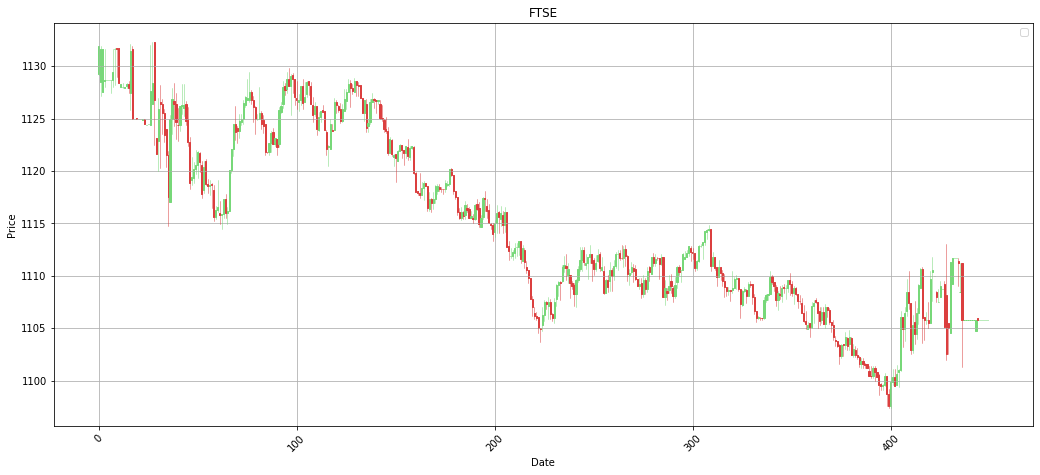

In [187]:
fig, ax = graph_data(data = plot_data_trade, figsize=(16,8))

No handles with labels found to put in legend.


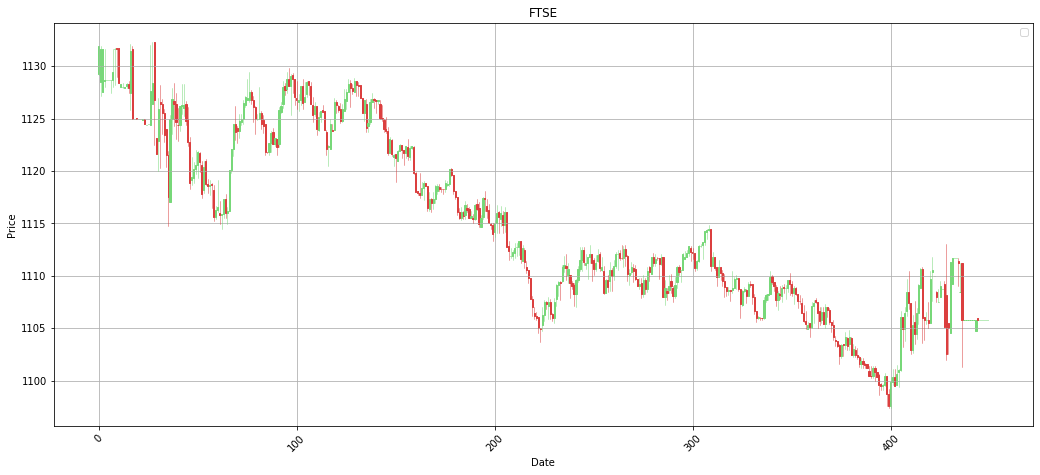

In [188]:
fig, ax = graph_data(data = plot_data_quote, figsize=(16,8))